<br>
<center>

# Assignments for Week 6

</center>

<div style="text-align: right; width: 15%; margin-left: auto;">
    
Jon Cannaday <br>
DSC 550 <br>
4/19/2024  

</div>


## Part 1: Identify Problem
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

Theater reviews offer valuable insights into audience perceptions and preferences, but analyzing thousands of reviews from numerous theaters poses a significant challenge. Extracting meaningful information from such vast amounts of text data is time-consuming, expensive, and prone to errors. Therefore, the need arises for a mechanized approach to accurately log and summarize theater reviews to understand audience concerns, preferances, and identify trends across different theaters or regions.

## Part 2: Define Target
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

The objective is to vectorize theater reviews, transforming them into numerical representations that can be analyzed using machine learning techniques. By vectorizing the reviews, we aim to capture the essence of each review in a structured format, enabling efficient analysis and interpretation.

## Part 3: Analize Data
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Connection

In [2]:
file = r'C:\Users\Owner\OneDrive\Desktop\DataScience\2024_Spring_DataMining\Reviews.xlsx'

Data Objects

In [3]:
data = pd.DataFrame(pd.read_excel(file))

Table Structure

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4864 entries, 0 to 4863
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  2607 non-null   object
 1   Rating  4864 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 76.1+ KB


Descriptive stats

In [5]:
data.describe(include='all')

,Review,Rating
count,2607,4864.000000
unique,2540,NaN
top,Love it,NaN
freq,5,NaN
mean,NaN,4.376439
std,NaN,1.102195
min,NaN,1.000000
25%,NaN,4.000000
50%,NaN,5.000000
75%,NaN,5.000000


Identify Nulls

In [6]:
# Replace blanks with nulls
data.replace('', np.nan, inplace=True)

In [7]:
# Count nulls
nulls_review = data['Review'].isna().sum()
nulls_rating = data['Rating'].isna().sum()

print("Nulls in Review column:", nulls_review)
print("Nulls in Rating column:", nulls_rating)

Nulls in Review column: 2257
Nulls in Rating column: 0


When there is not a review, how does it rate?

Set up for a hypothesis test to see if the people who do not leave a review tend to give better ratings than those who do give reviews.

In [8]:
null_data = data[data['Review'].isna()]

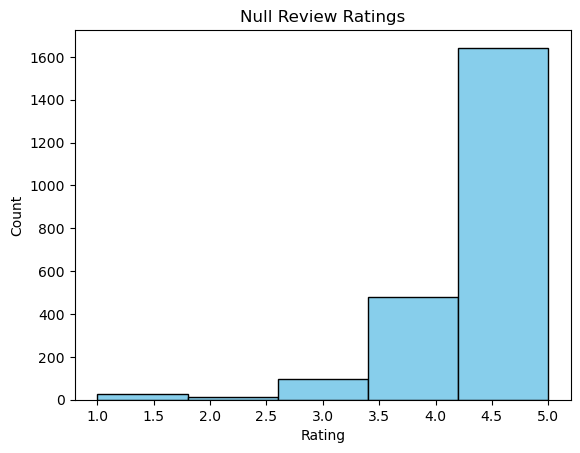

In [9]:
# Histogram
plt.hist(null_data['Rating'], bins=5, color='skyblue', edgecolor='black')

# Lable
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Null Review Ratings')

# Plot
plt.show()

Looks like the non review ratings are negativly skewed.

When there is a review, how does it rate?

Will use this data with actual reviews to train the model to allocate words to ratings.

In [10]:
valid_data = data[data['Review'].notna()]

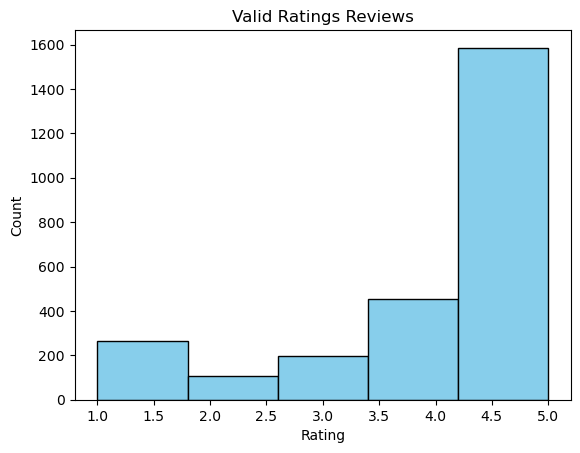

In [11]:
# Histogram
plt.hist(valid_data['Rating'], bins=5, color='skyblue', edgecolor='black')

# Lables
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Valid Ratings Reviews')

# Plot
plt.show()

Similar to the non review section there is a negative skew but more moderate than the last group.

Outliers

Want to be sure that the rating numbers do not fall out of the expected 1-5 range.

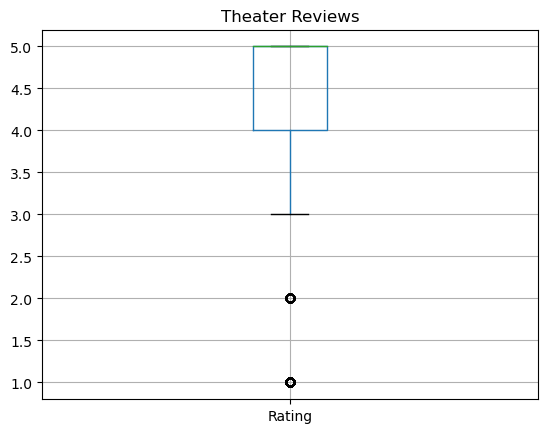

In [20]:
# Box Plot
data.boxplot()

# Title
plt.title('Theater Reviews')

# Plot
plt.show()

The ratings fall within expected ranges with the bulk of the data on the higher (5) end further stressing the negative skew.

In [13]:
data.describe()

,Rating
count,4864.000000
mean,4.376439
std,1.102195
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Using the data with non-null reviews.

Create Binary Output

Set up the data to be binary so that the model engine will recognize the positive vs negative rating.

In [ ]:
# Positive or Negative Scoring on Valid Data
valid_data.loc[:, 'Reaction'] = (valid_data['Rating'] >= 3).astype(int)

Drop Rating Column

After creating the binary column determined to be >= 3 as good and < 3 as bad. 

Get a quick view of the proportions of ratings to see how well trained the model will be.

In [ ]:
valid_data.drop(columns=['Rating'], inplace=True)

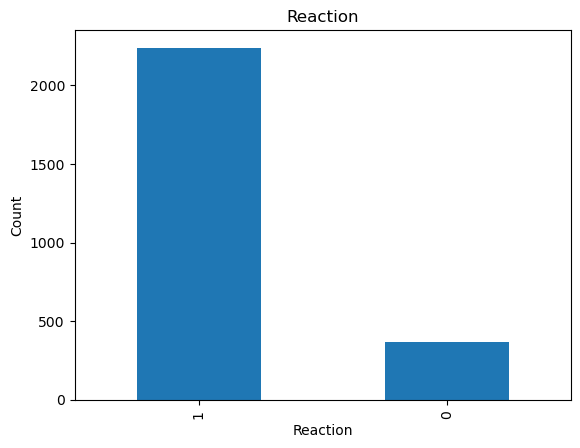

In [16]:
# Bar Graph
valid_data['Reaction'].value_counts().plot(kind='bar')

# Lables
plt.xlabel('Reaction')
plt.ylabel('Count')
plt.title('Reaction')

# 1plot
plt.show()

Looks to have more data on the "Good" side than the "bad". May want to consider removing the 3 value all to gether and work with the extreems only.

In [17]:
valid_data.head()

,Review,Reaction
0,"Waited in line to order kettle corn, and while...",0
1,A waste of money and time as a grown adult bei...,0
2,Nachos clearly come with 2 cheeses even the pa...,1
3,Uncomfortable seats. Staff customer service wa...,0
4,Giving it one star because they charge for onl...,0


In [44]:
for_grins_data = data[data['Review'].notna()]

In [45]:
for_grins_data = for_grins_data[for_grins_data['Rating'] != 3]

In [46]:
for_grins_data.loc[:, 'Reaction'] = (for_grins_data['Rating'] >= 4).astype(int)

In [47]:
for_grins_data.drop(columns=['Rating'], inplace=True)

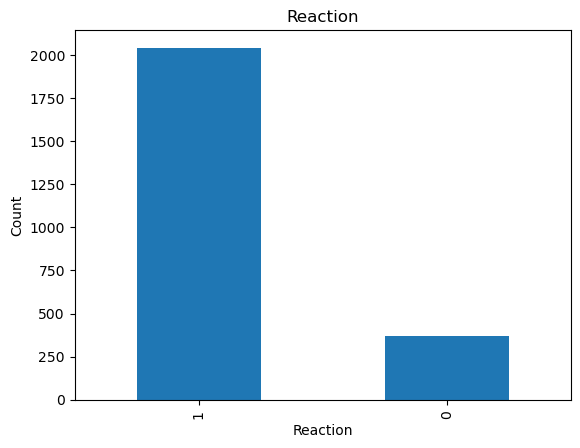

In [48]:
# Bar Graph
for_grins_data['Reaction'].value_counts().plot(kind='bar')

# Lables
plt.xlabel('Reaction')
plt.ylabel('Count')
plt.title('Reaction')

# 1plot
plt.show()

Removign the 3 value did not seem to flatten out the groups.

Word Count

Preparing the way for for further analysis or hypothesis test to see if if angry customers write novels vs the happy customers quick and to the point.

In [ ]:
valid_data['Word_Count'] = valid_data['Review'].apply(lambda x: len(str(x).split()))

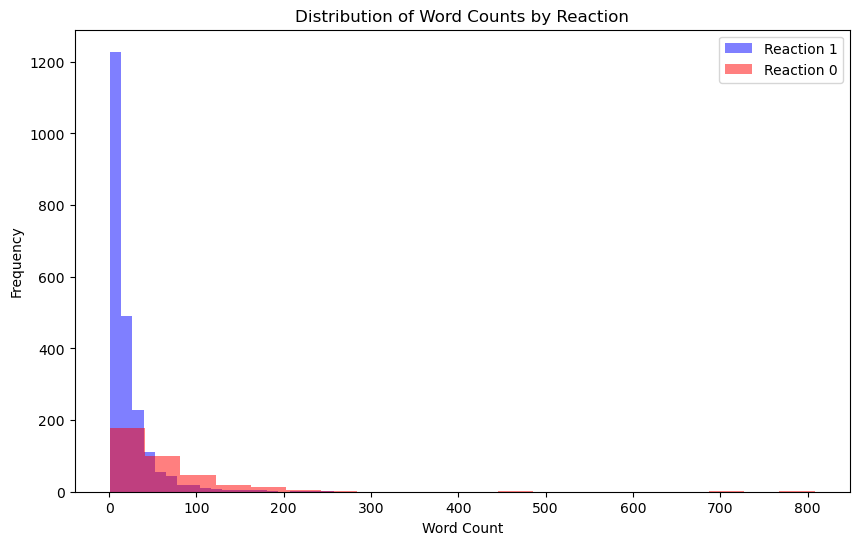

In [19]:
reaction_1_data = valid_data[valid_data['Reaction'] == 1]
reaction_0_data = valid_data[valid_data['Reaction'] == 0]

# Histograms for word counts
plt.figure(figsize=(10, 6))
plt.hist(reaction_1_data['Word_Count'], bins=20, alpha=0.5, color='blue', label='Reaction 1')
plt.hist(reaction_0_data['Word_Count'], bins=20, alpha=0.5, color='red', label='Reaction 0')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts by Reaction')
plt.legend()
plt.show()

The data here is spread fairly considerabley. But those 800 ends would like to see if this supports that angry customers write more than happier customers. this could be quantified and help the model's accuracy.

## Part 4: Conclusion
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

We began by stating a challenge associated with the volume of reviews and the spead of theaters. This opened up the opportunity for developing a cechanism to help assist in this task of organizing reviews. Through the reviews we can aid to our understanding from audiance concerns, sentaments, suggestions, preferances, and trends. We effectivly cut costs by saving the manual take of looking through reviews, recording them, and making data driven decitions. The analysis conducted helped flush out the review data we pulled in. We looked at the overall spread of data and checked the validity of the numbers and set up groups for hypothesis testing later in the process. We prepped the data and established busness logic to convert the ratings into a binary classifier and clean some of the data. The next few steps will be cleaning up the text and running the nessisary code to classify the respones to help aid the theaters. Overall, this analysis empowers theaters to better understand their audience and tailor their offerings to meet their needs and expectations.